<a href="https://colab.research.google.com/github/vparro/MLprobabilistico/blob/master/AjustandoDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configurações básicas

In [0]:
import pylab as pp
import numpy as np
from scipy import integrate, interpolate
from scipy import optimize

# Referências

https://stackoverflow.com/questions/11278836/fitting-data-to-system-of-odes-using-python-via-scipy-numpy

In [0]:


##initialize the data
x_data = np.linspace(0,9,10)
y_data = np.array([0.000,0.416,0.489,0.595,0.506,0.493,0.458,0.394,0.335,0.309])


def f(y, t, k): 
    """define the ODE system in terms of 
        dependent variable y,
        independent variable t, and
        optinal parmaeters, in this case a single variable k """
    return (-k[0]*y[0],
          k[0]*y[0]-k[1]*y[1],
          k[1]*y[1])

def my_ls_func(x,teta):
    """definition of function for LS fit
        x gives evaluation points,
        teta is an array of parameters to be varied for fit"""
    # create an alias to f which passes the optional params    
    f2 = lambda y,t: f(y, t, teta)
    # calculate ode solution, retuen values for each entry of "x"
    r = integrate.odeint(f2,y0,x)
    #in this case, we only need one of the dependent variable values
    return r[:,1]

def f_resid(p):
    """ function to pass to optimize.leastsq
        The routine will square and sum the values returned by 
        this function""" 
    return y_data-my_ls_func(x_data,p)
#solve the system - the solution is in variable c
guess = [0.2,0.3] #initial guess for params
y0 = [1,0,0] #inital conditions for ODEs
(c,kvg) = optimize.leastsq(f_resid, guess) 
#get params



[0.5221712 0.181713 ]


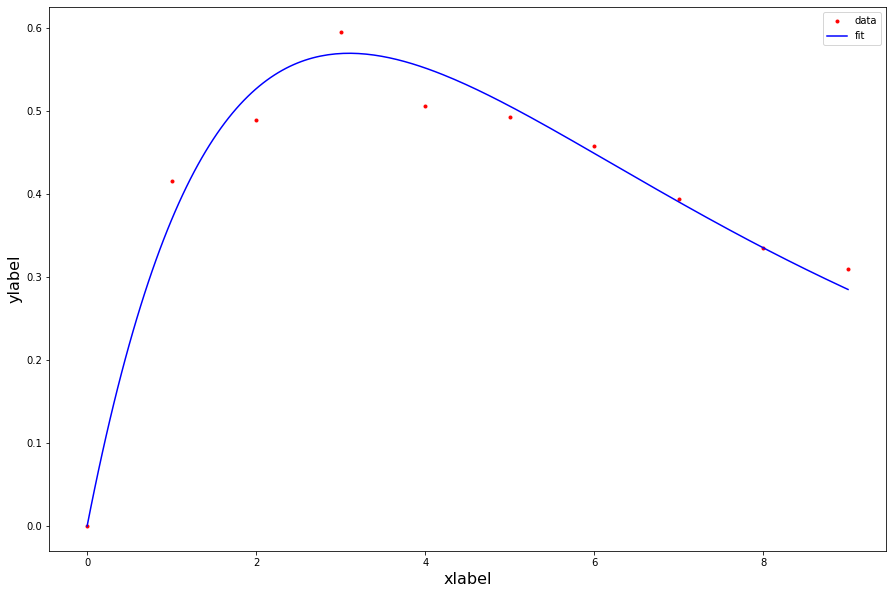

In [7]:
# print "parameter values are ",c
print(c)

# fit ODE results to interpolating spline just for fun
xeval=np.linspace(min(x_data), max(x_data),30) 
gls = interpolate.UnivariateSpline(xeval, my_ls_func(xeval,c), k=3, s=0)

#pick a few more points for a very smooth curve, then plot 
#   data and curve fit
xeval=np.linspace(min(x_data), max(x_data),200)
#Plot of the data as red dots and fit as blue line
pp.figure(figsize=(15,10))
pp.plot(x_data, y_data,'.r',xeval,gls(xeval),'-b')
pp.xlabel('xlabel',{"fontsize":16})
pp.ylabel("ylabel",{"fontsize":16})
pp.legend(('data','fit'),loc=0)
pp.show()